# Assessment 1
## Data Loading

In [2]:
import pandas as pd
import numpy as np
import pathlib
import warnings

warnings.filterwarnings('ignore')

In [3]:
path_home = pathlib.Path.cwd().parent
train = pd.read_csv(path_home / 'patient_files_train.csv')
test = pd.read_csv(path_home / 'patient_files_test.csv')

In [4]:
train.shape

(599, 11)

In [5]:
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [7]:
train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are no missing values in the dataset, once the ID and Insurance values are removed. Blood Work Result-2 ('SK') and Blood Work Result-3 ('TS') looks like they could use further investigation, with a strangely high standard deviation compared to their mean and a large amount of variance. We also can observe that the partipants in the study were aged between 21 and 81, something that may become important if there is a correlation with age later in the analysis.  

## Exploratory Data Analysis
First, let's make a copy of the train dataset so that none of our changes after the original dataset.

In [8]:
train_eda = train.copy()
train_eda = train_eda.drop(columns=['ID', 'Insurance'])

In [9]:
train_eda.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white', palette='mako', rc={"axes.spines.right": False, "axes.spines.top": False})

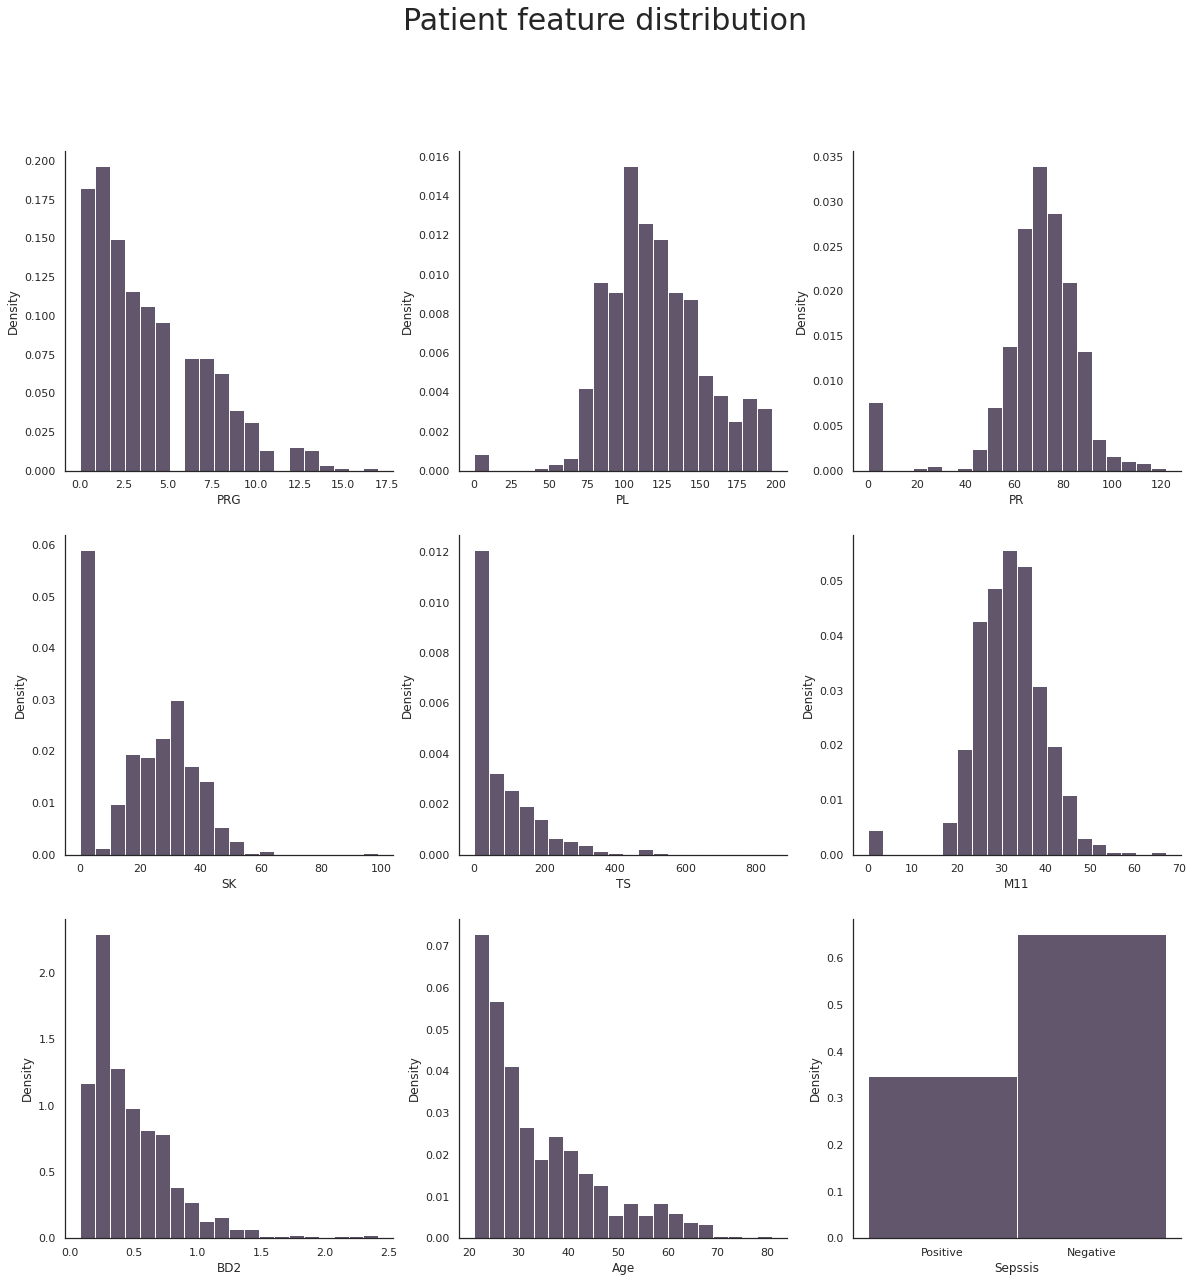

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Patient feature distribution', fontsize=30)

for i, col in enumerate(train_eda.columns):
    sns.histplot(train_eda[col], ax=axes[int(i/3), i%3], stat='density', bins=20)

plt.show()

### Data Distribution
We can see that Blood Work Result-1, 2 and BMI are all relatively normally distributed. Plasma glucose and Blood Work Result-4 could also be normally distributed, with low peaks and Blood Work Result-2 seems to be normal, however, contains many 0 values, which we might interpret as missing data. 

We can be 100% confident that M11 (BMI) values of 0 are missing data, and can impute accordingly. Similarly, we can be 100% confident that PR (Blood Pressure) must be a non-zero value. For the Blood Work features (PL, SK, TS and BD2) we can't be certain that 0 values are missing data, although in the SK distribution it seems that this might be the case.

In terms of the shapes of the distributions, it's likely that Blood Glucose, Blood Work Result-3, 4 and patient age have a different distribution due to a non-normal, exponential distribution. The target class sepsis is also biased towards negative results, which may need to be considered. 

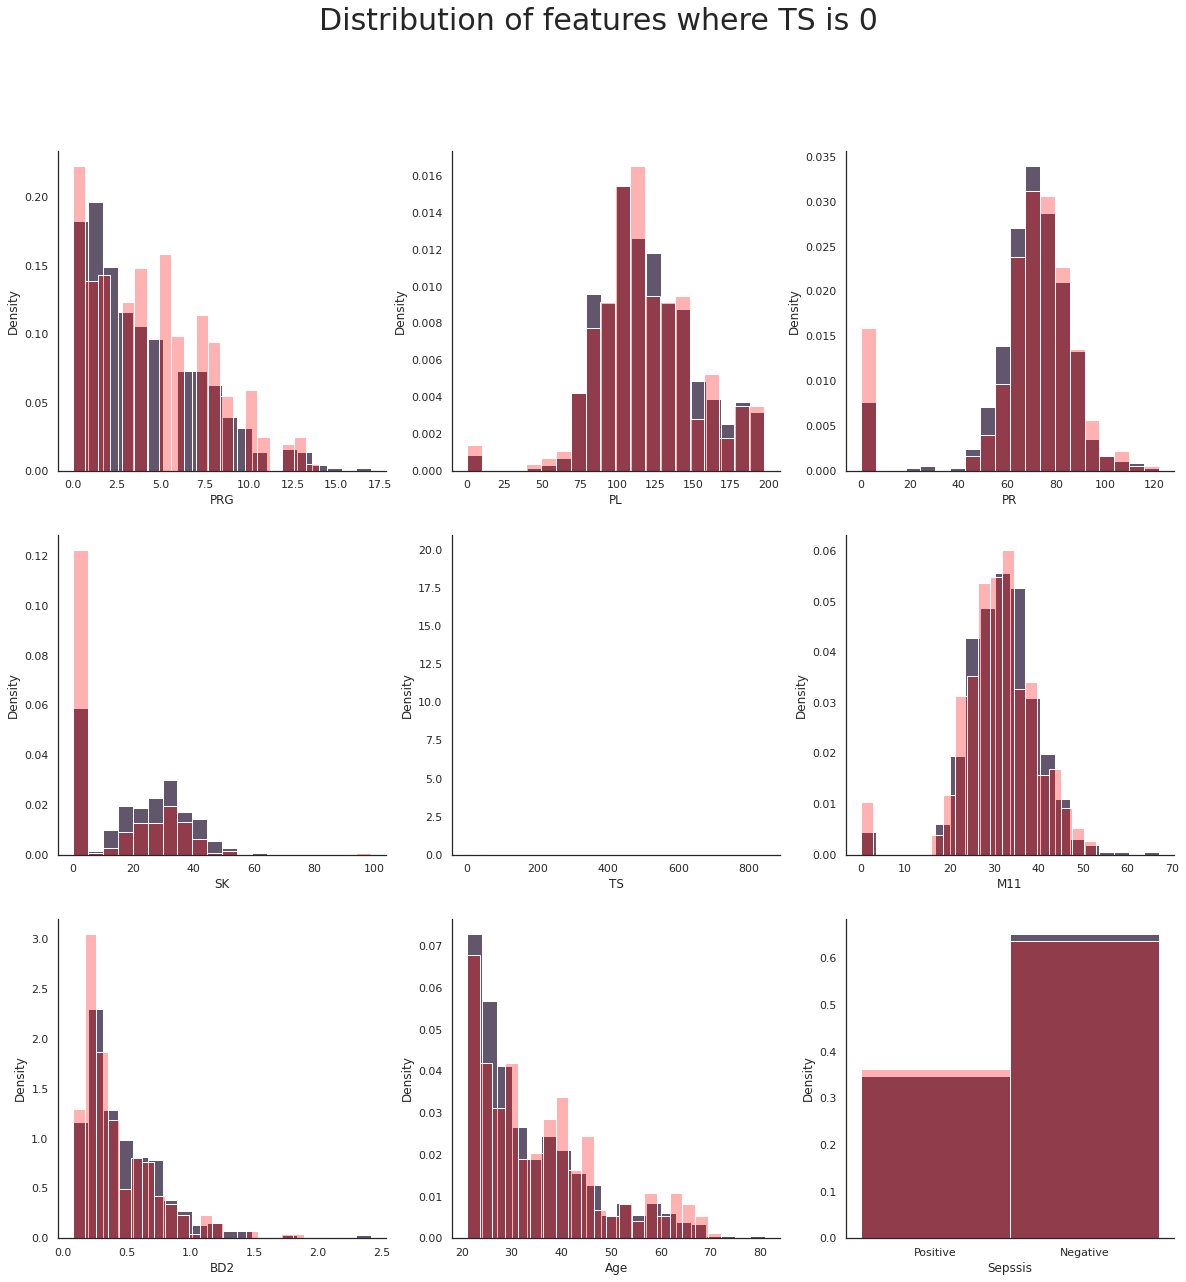

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Distribution of features where TS is 0', fontsize=30)

for i, col in enumerate(train_eda.columns):
    sns.histplot(train_eda[col], ax=axes[int(i/3), i%3], stat='density', bins=20)
    sns.histplot(train_eda[train_eda['TS'] == 0][col], ax=axes[int(i/3), i%3], stat='density', bins=20, color='r', alpha=0.3)

plt.show()


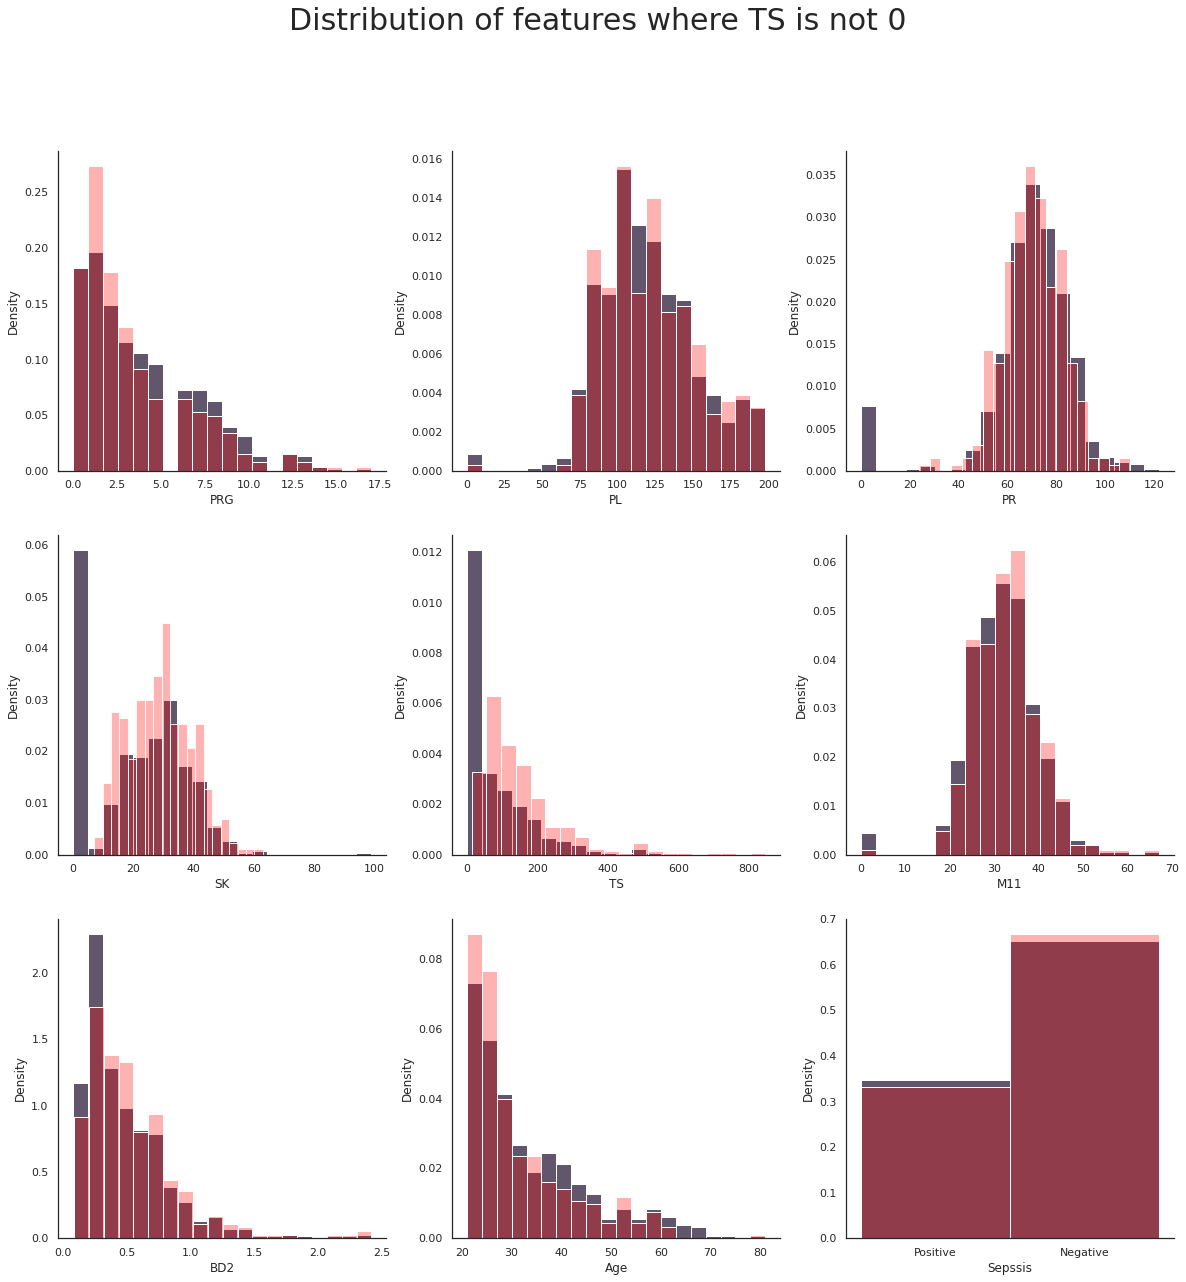

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Distribution of features where TS is not 0', fontsize=30)

for i, col in enumerate(train_eda.columns):
    sns.histplot(train_eda[col], ax=axes[int(i/3), i%3], stat='density', bins=20)
    sns.histplot(train_eda[train_eda['TS'] != 0][col], ax=axes[int(i/3), i%3], stat='density', bins=20, color='r', alpha=0.3)

plt.show()

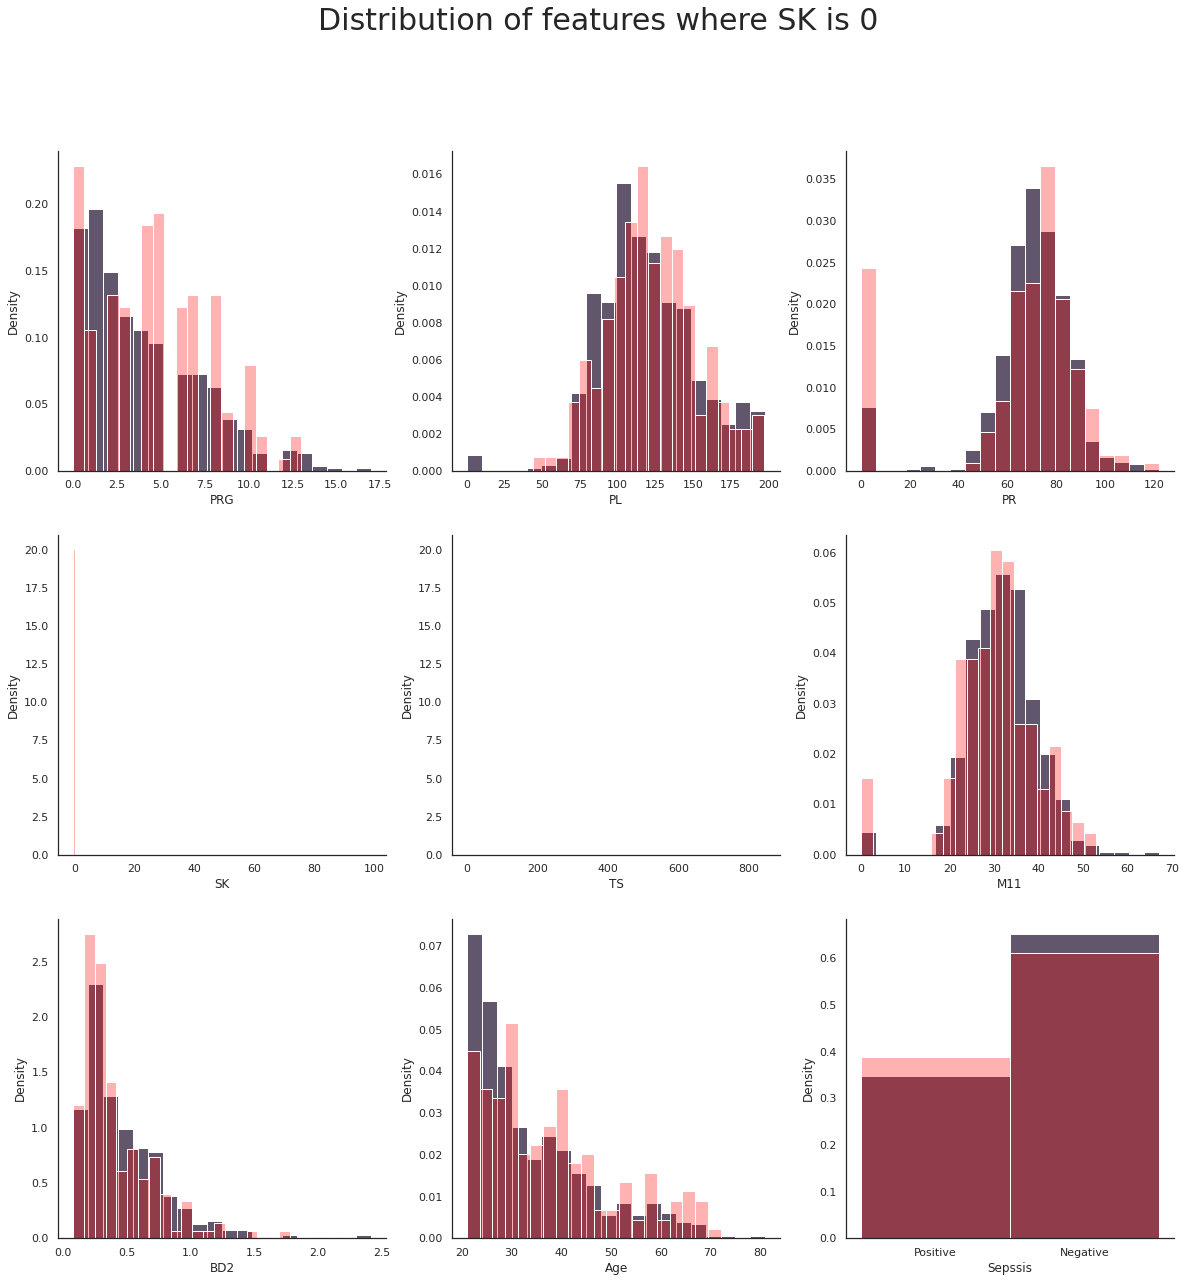

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Distribution of features where SK is 0', fontsize=30)

for i, col in enumerate(train_eda.columns):
    sns.histplot(train_eda[col], ax=axes[int(i/3), i%3], stat='density', bins=20)
    sns.histplot(train_eda[train_eda['SK'] == 0][col], ax=axes[int(i/3), i%3], stat='density', bins=20, color='r', alpha=0.3)

plt.show()

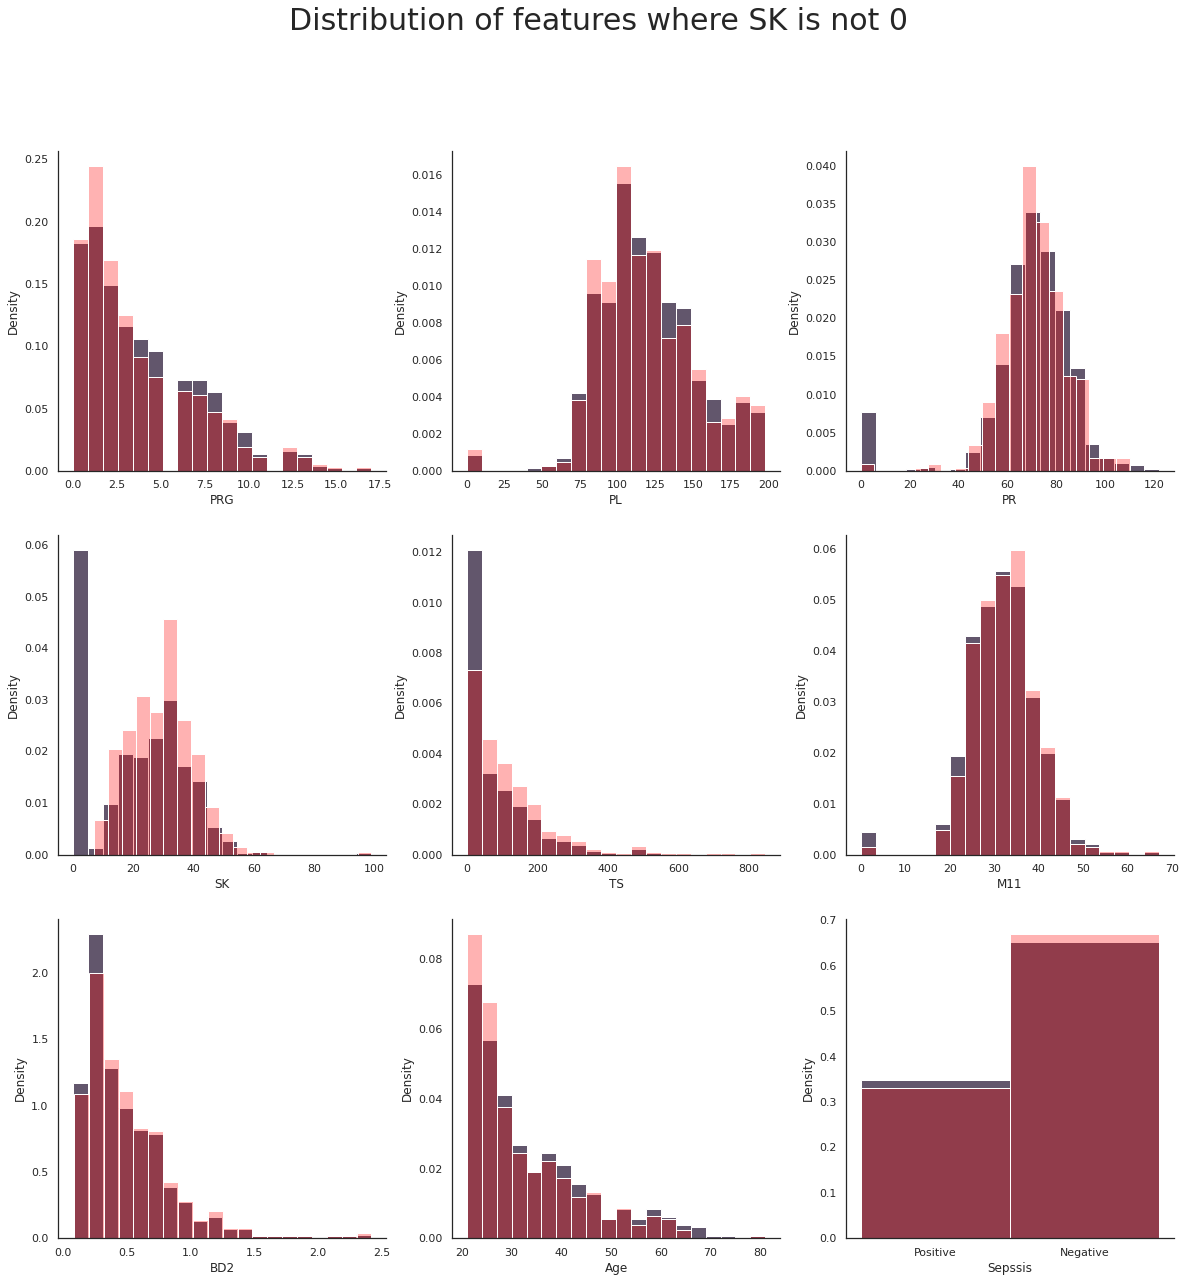

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Distribution of features where SK is not 0', fontsize=30)

for i, col in enumerate(train_eda.columns):
    sns.histplot(train_eda[col], ax=axes[int(i/3), i%3], stat='density', bins=20)
    sns.histplot(train_eda[train_eda['SK'] != 0][col], ax=axes[int(i/3), i%3], stat='density', bins=20, color='r', alpha=0.3)

plt.show()

This seems to show us that for records where TS and SK are 0 the distribution of the data is relatively undisturbed. This supports the theory that some of the Blood Work features are in fact missing data.

Otherwise, the features seem mostly normally distributed, with one or two non-normal distributions.

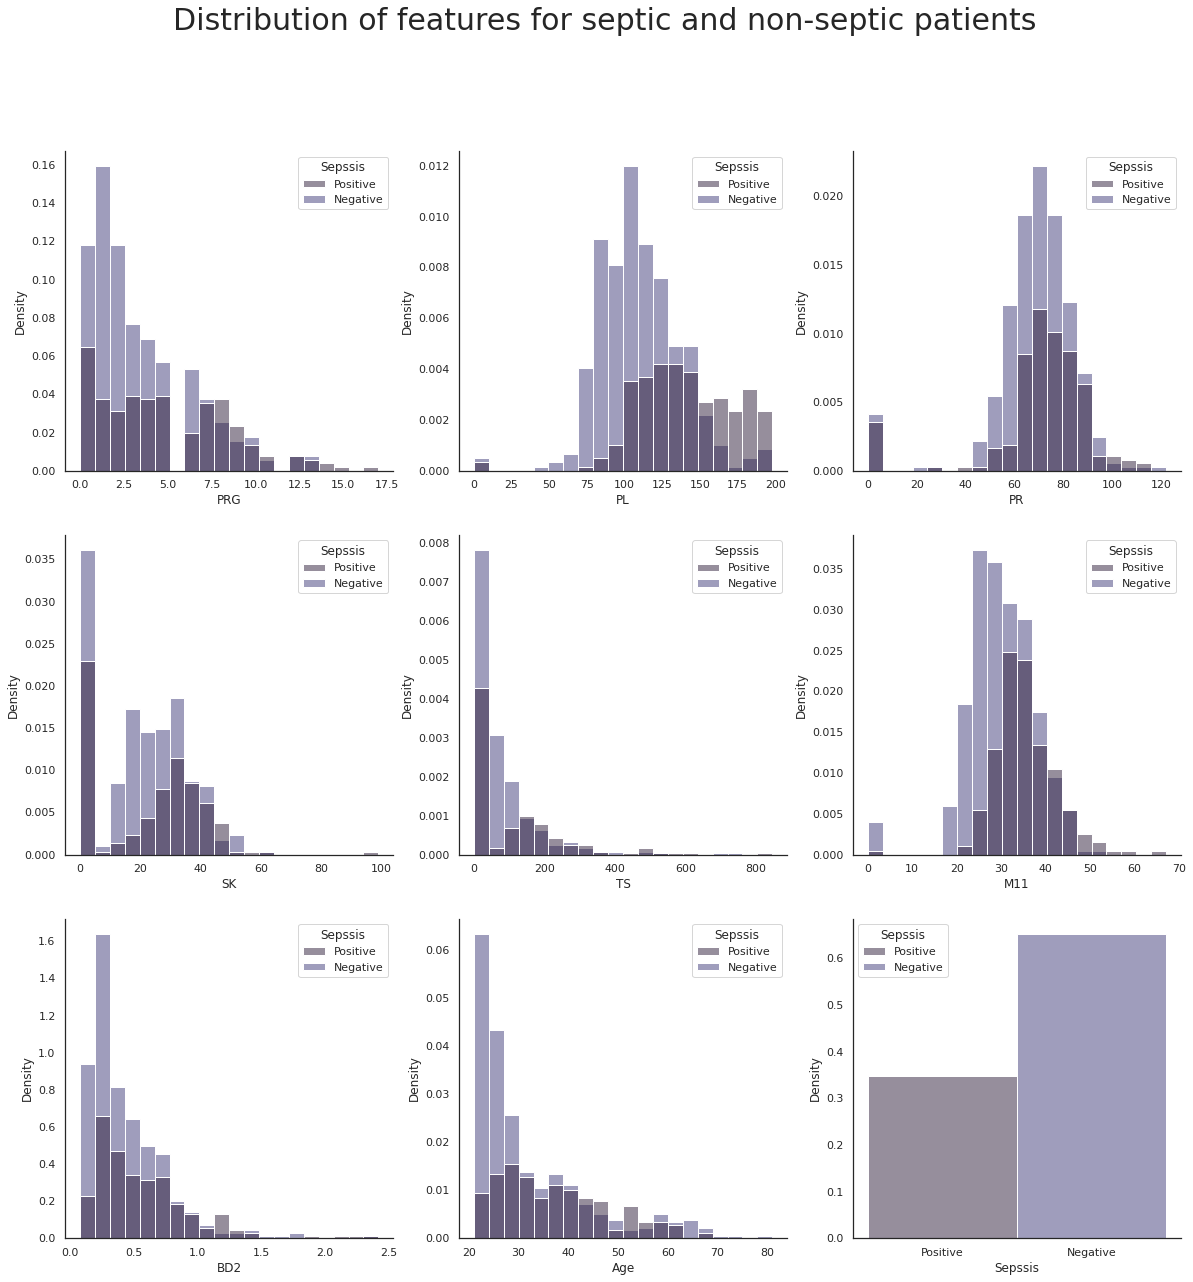

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Distribution of features for septic and non-septic patients', fontsize=30)

for i, col in enumerate(train_eda.columns):
    sns.histplot(train_eda, x=col, hue='Sepssis', ax=axes[int(i/3), i%3], stat='density', bins=20)

plt.show()

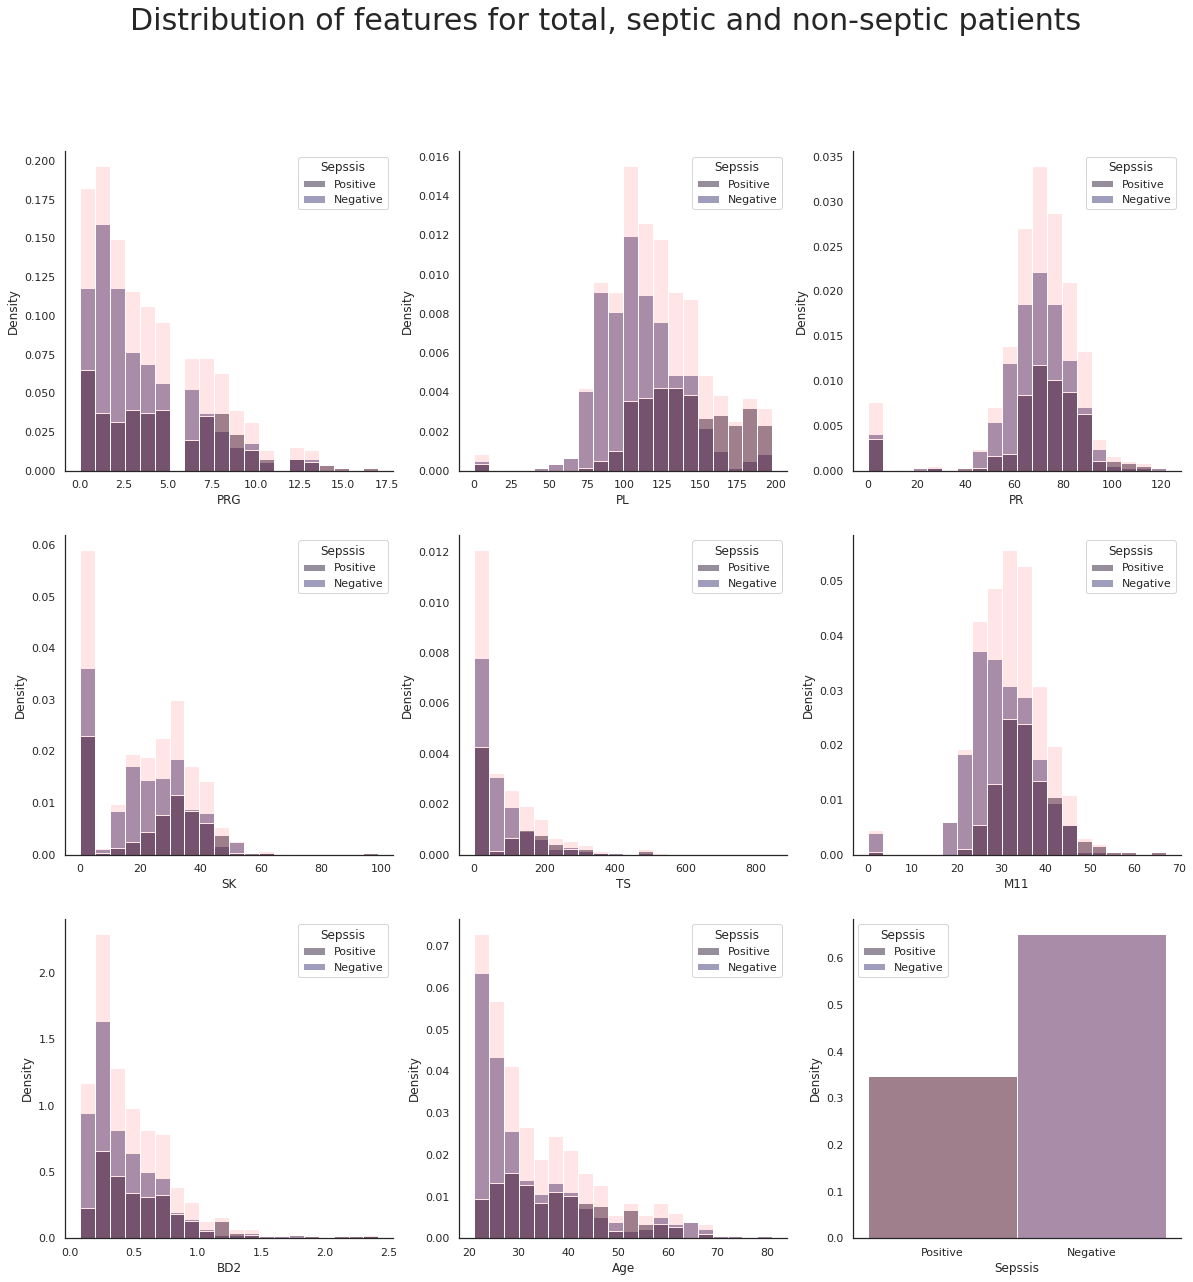

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Distribution of features for total, septic and non-septic patients', fontsize=30)

for i, col in enumerate(train_eda.columns):
    sns.histplot(train_eda, x=col, hue='Sepssis', ax=axes[int(i/3), i%3], stat='density', bins=20)
    sns.histplot(train_eda[col], ax=axes[int(i/3), i%3], stat='density', bins=20, alpha=0.1, color='r')

plt.show()

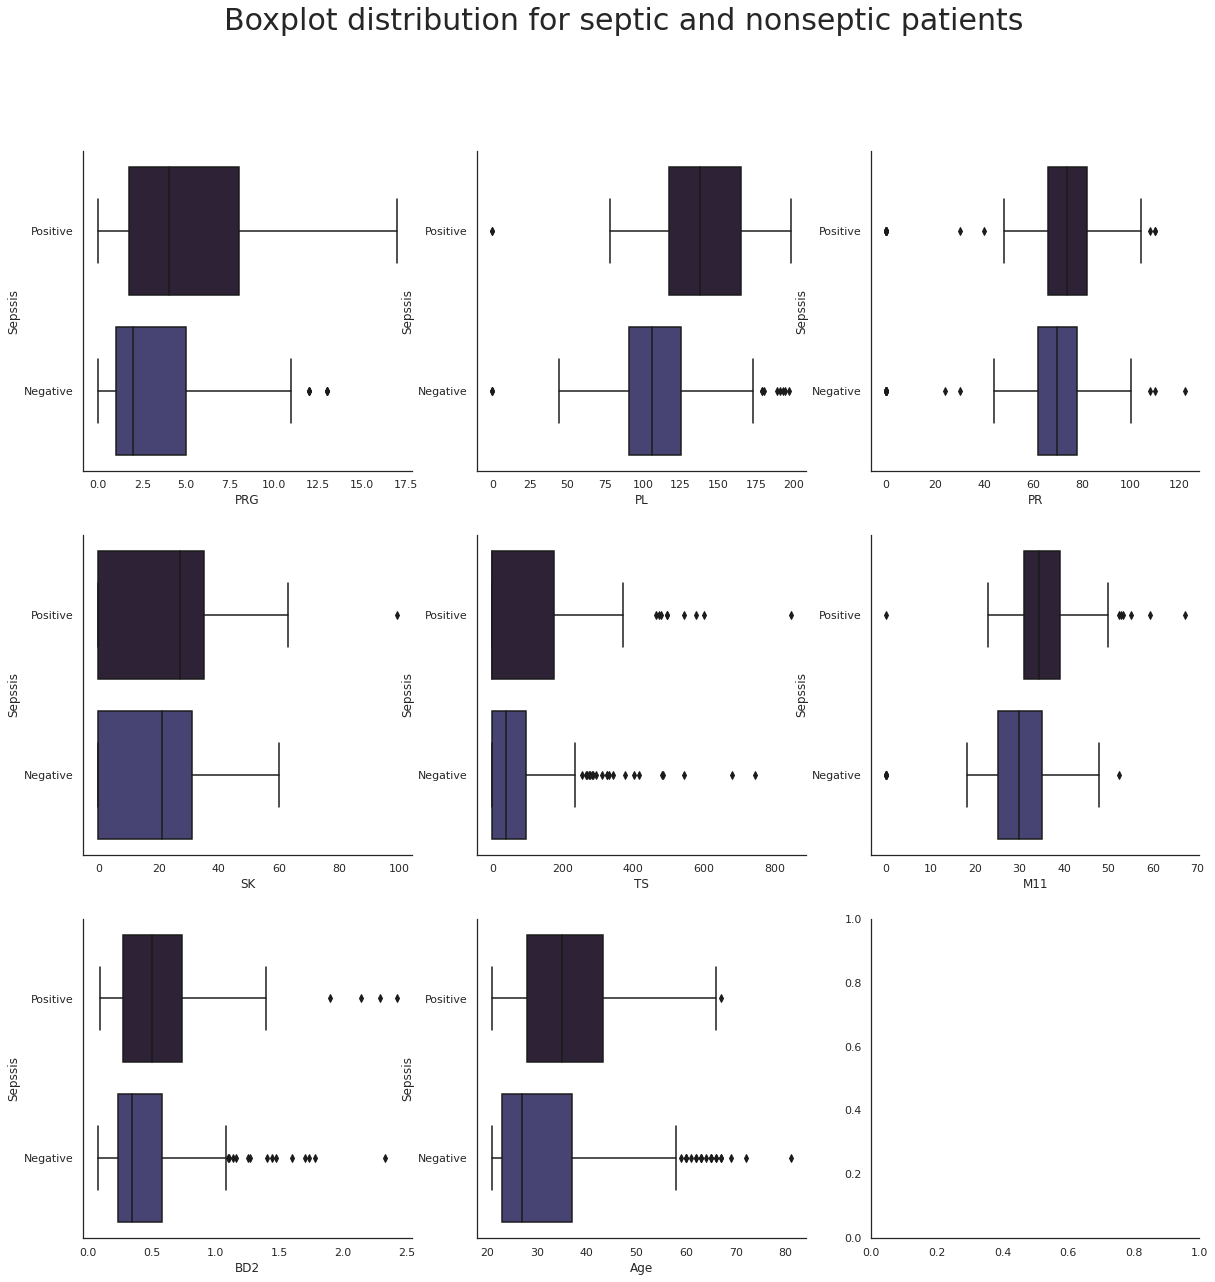

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Boxplot distribution for septic and nonseptic patients', fontsize=30)

for i, col in enumerate(train_eda.columns):
    if col == 'Sepssis': continue
    sns.boxplot(data=train_eda, x=col, y='Sepssis', ax=axes[int(i/3), i%3])

plt.show()

When comparing the density distributions for the target feature values, we can see that there are interesting underlying patterns and somewhat bimodal distributions for some of the features. In particular, higher values of PL (Blood Work Result-1) seems to be a good indicator for the presence of sepsis, and younger patients seem to be more likely not to be septic, despite the higher number of younger patients in the dataset. 

The distribution comparison also shows that missing values in the Blood Work features are relatively evenly split between target feature variables, indicating that imputing these values should be a suitable solution. 

Overall, most features with higher values are represented by a postive target feature.

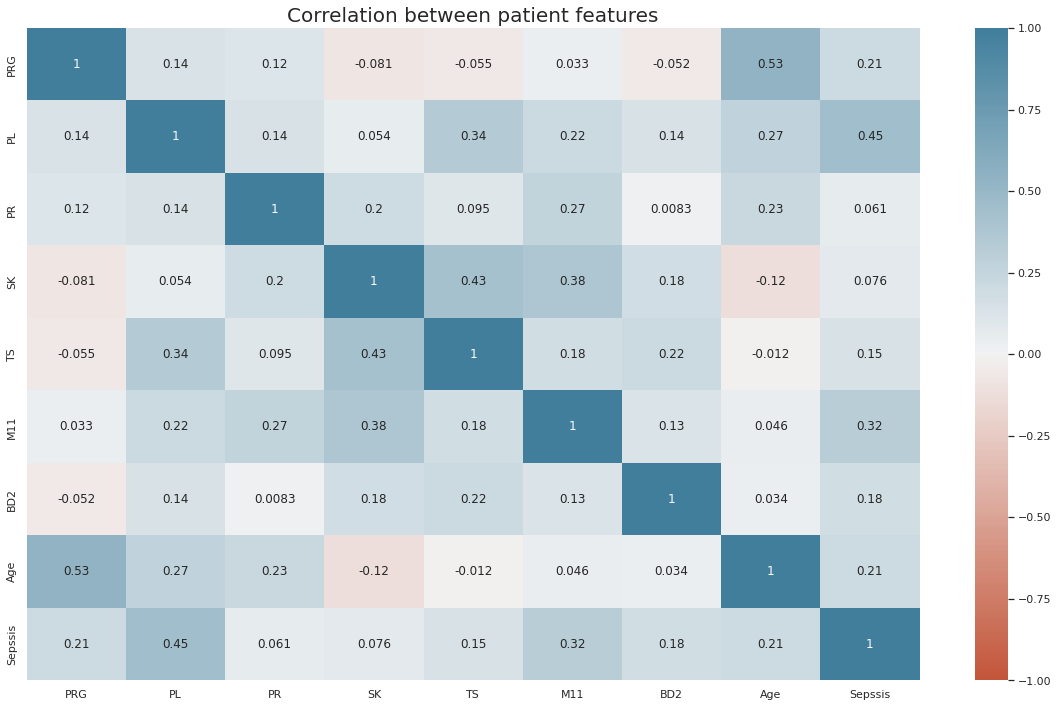

In [19]:
# Adding sepsis as a numeric column in order to calculate a correlation matrix
train_eda['Sepssis'] = train['Sepssis'] == 'Positive'

fig, axes = plt.subplots(figsize=(20,12))
cmap = sns.diverging_palette(20, 230, as_cmap=True)

corr = train_eda.corr()
sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1, vmax=1)
axes.set_title('Correlation between patient features', fontsize=20)

plt.show()

From the pearsons correlation matrix, we can see that there are two features that seem to be linearly related to the target variable, sepsis. PL (Blood Work Result-2) and M11 (BMI^2) have a slight positive correlation, where PL is also correlated with other features in the dataset. This is promising, as we also know that there are some non-linearity similarities between features like age.

### Missing Values
There seem to be missing data in this dataset, as described by the `README` doc. It seems that these values might be where the Blood Work Results are 0. To discover the impacts of these missing values on the dataset, we will filter the data by the values that are 0, which are most likely to be missing values and not accurate results. Hopefully, a 0 in one column also indicates a 0 in another column where we have less certainty about the genuinity of the results. Therefore, we will filter the data in this order:
1. M11 (Body Mass Index) - this value almost certainly cannot be 0
2. PR (Blood Pressure) - this value almost certainly cannot be 0
3. PL (Blood Work Result-1) - this result probably cannot be 0, and the distribution of the non-zero values supports this
4. SK (Blood Work Result-3) - this result probably cannot be 0, and the distrubution of the non-zero values supports this
5. TS (Blood Work Result-4) - this result seems to gather toward 0, and the distrubution seems unclear

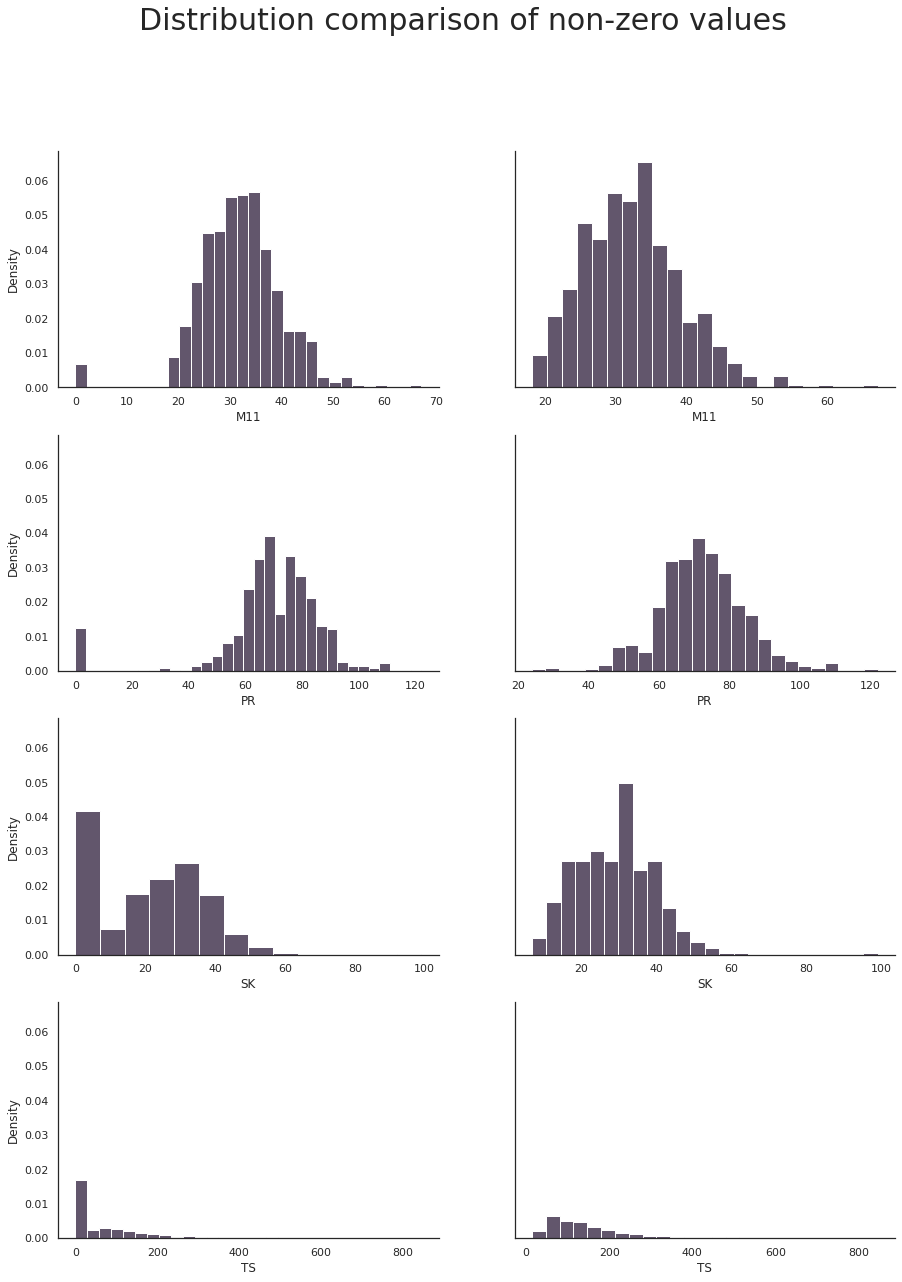

In [20]:
fig, axes = plt.subplots(4, 2, sharey=True, figsize=(15, 20))
fig.suptitle('Distribution comparison of non-zero values', fontsize=30)

cols = ['M11', 'PR', 'SK', 'TS']

for i, col in enumerate(cols):
    sns.histplot(ax=axes[i, 0], data=train_eda[col], stat='density')
    sns.histplot(ax=axes[i, 1], data=train_eda[col][train_eda[col] != 0], stat='density')

plt.show()

The distributions of each of the features are clearer after filtering the 0 values and seem to show normal distributions. We have a few options to deal with the missing values. 

1. One option is to use the **mean** of each of the features to impute missing values. This is appropriate in each of these cases, as we can assume that the underlying data is distributed normally. The trade off for this method is that we will sacrifice some of the bias in our data. This might render any regularisation techniques we use in the model less useful.
2. A second method might be to impute the **mean** for different subgroups, where further exploration is necessary. I would guess that stratifying by age could be a good option. 
3. Some other considerations could be to impute constant values using the **median** or the **mode** of each feature. This could be useful if there are skewed distributions for any of the features.

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class StratifiedImputer(BaseEstimator, TransformerMixin):
    '''
    Imputes missing values (0) with the mean of a stratified feature.
    '''
    def __init__(self, by=None, bins=None):
        self.by = by
        self.bins = bins
    
    def fit(self, X, y=None):
        self.cut = pd.cut(X[self.by], self.bins)
        self.mean = X.groupby(self.cut).transform('mean')
        return self
    
    def transform(self, X, y=None):
        X = X.replace(0, np.nan)

        for col in X.columns:
            X[col] = X[col].fillna(self.mean[col])
        
        return X.astype('float32') # .values.astype('float64')

The above function will impute values of 0 in the features as the stratified mean, by age group. For age, although there are no missing values in the training dataset, it is possible that there could be missing values in the unseen, testing dataset. We use **median** instead of mean, as the Age feature is negatively skewed.

In [22]:
bins = [21, 26, 31, 36, 41, 51, 61, 100]
strat = 'Age'

# si = StratifiedImputer(stratify_feature=strat, bins=bins)
si = StratifiedImputer('Age', 10)
# train_eda_imputed = si.fit_transform(train_eda.drop(columns='Sepssis'))
train_eda_imputed = pd.DataFrame(si.fit_transform(train_eda.drop(columns='Sepssis')), columns=train_eda.columns[:-1])

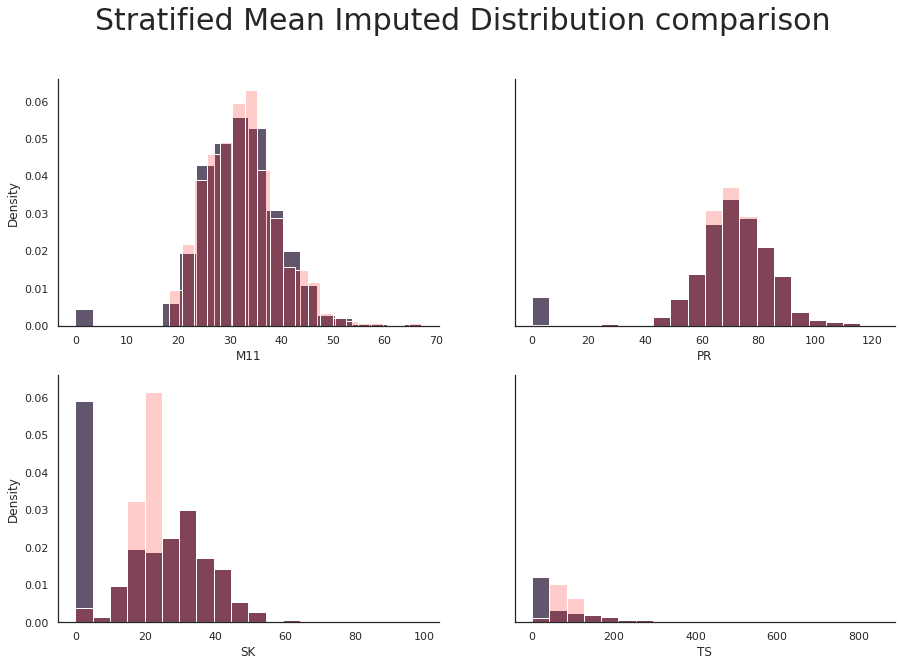

In [23]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Stratified Mean Imputed Distribution comparison', fontsize=30)

cols = ['M11', 'PR', 'SK', 'TS']

for i, col in enumerate(cols):
    sns.histplot(ax=axes[int(i/2), i%2], data=train_eda[col], stat='density', bins=20)
    sns.histplot(ax=axes[int(i/2), i%2], data=train_eda_imputed[col], stat='density', alpha=0.2, color='r', bins=20)

plt.show()

In [24]:
from sklearn.impute import SimpleImputer
train_eda_imputed_mean = train_eda.copy()

simple_imputer = SimpleImputer(strategy='mean', missing_values=0)
train_eda_imputed_mean.iloc[:,:-1] = simple_imputer.fit_transform(train_eda.drop(columns='Sepssis'))

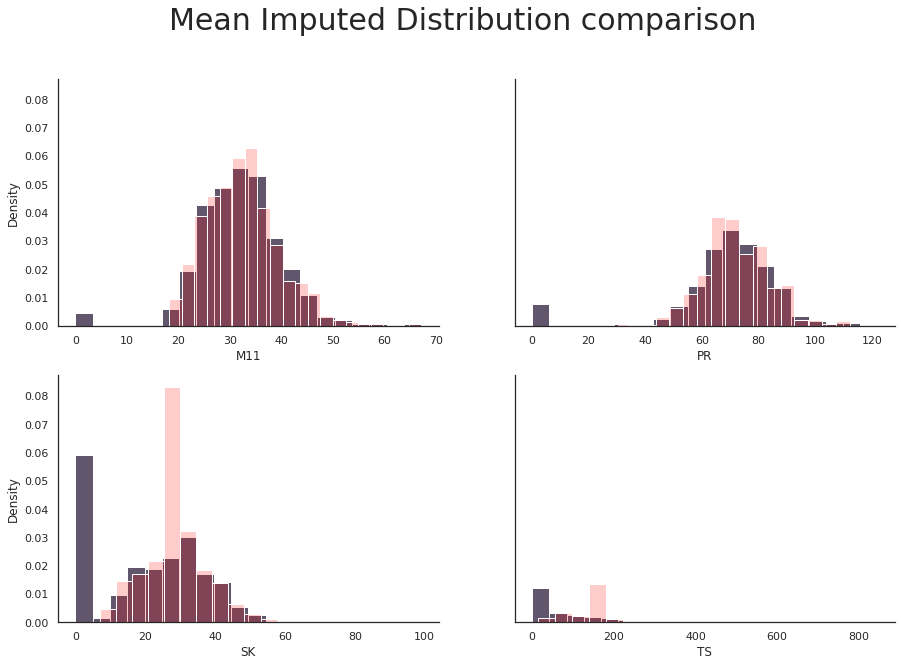

In [25]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(15, 10))
fig.suptitle('Mean Imputed Distribution comparison', fontsize=30)

cols = ['M11', 'PR', 'SK', 'TS']

for i, col in enumerate(cols):
    sns.histplot(ax=axes[int(i/2), i%2], data=train_eda[col], stat='density', bins=20)
    sns.histplot(ax=axes[int(i/2), i%2], data=train_eda_imputed_mean[col], stat='density', alpha=0.2, color='r', bins=20)

plt.show()

We can see that using the mean imputer, without stratifying by age causes spikes in the distribution when there are many missing values. The effects of this are quite pronounced with SK and TS. This effect is reduced by when using the means of each age group. We can also see that TS looks more similar to a normal distribution that previously though, likely due to many outliers and missing values skewing the original plots.

## Data Preprocessing
From the exploratory data analysis performed earlier, we know that we must take the following steps:
1. Drop the 'ID' and 'Insurance' columns
2. Impute missing values, using a constant feature mean
3. Normalise all features with the StandardScaler

For now, lets set up some baseline models to begin the iterative process and to understand which of the suggestions above improves the results of our model. We will simply impute missing values (0) with the mean for each feature, and perform standard scaling on each feature. 

We will use the **f1 score** as an evaluation metric, as the target features are imbalanced, meaning accuracy will not be a great indicator. We also want to emphasise **recall**, where we do not want to miss a true, positive case of sepsis. For this reason, f1 score - the harmonic mean between precision and recall is a much better evaluation metric than accuracy. As we are identifying health conditions it is more important accurately prediction True Positives than it is to minimise false positives. It doesn't matter as much if we have more type 1 errors (False Positives).

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, make_scorer

X = train.drop(columns=['Sepssis']).copy()
y = train['Sepssis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

class FeatureDropper(BaseEstimator, TransformerMixin): 
    '''
    Drops a list of features from the dataframe to be used in a pipeline
    '''
    def __init__(self, feature_names):
        self.feature_names = feature_names 
      
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        return X.drop(columns=self.feature_names)


### Baseline Models
First lets create a baseline preprocessing and modelling pipeline to test our different models. 

In [28]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
baseline_preprocess_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=0, strategy='mean')),
    ('scaler', StandardScaler())
])

baseline_full_pipeline = Pipeline([
    ('drop_columns', FeatureDropper(['ID', 'Insurance'])),
    ('preprocess', baseline_preprocess_pipeline),
    ('model', LogisticRegression(penalty='none')),
])

In [30]:
from sklearn.model_selection import GridSearchCV

f1 = make_scorer(f1_score, pos_label='Positive')
accuracy = make_scorer(accuracy_score)

baseline_params = [{
    'model' : [LogisticRegression(penalty='none')],
},
{
    'model' : [RidgeClassifier()],
},
{
    'model' : [DecisionTreeClassifier()],
    'preprocess__scaler' : [None],
},
{
    'model' : [RandomForestClassifier()],
    'preprocess__scaler' : [None],
}
]

baseline_gs = GridSearchCV(baseline_full_pipeline, baseline_params, scoring = {'f1': f1, 'accuracy': accuracy}, refit='f1', n_jobs=-1)
baseline_gs.fit(X_train, y_train)
baseline_results = pd.DataFrame(baseline_gs.cv_results_)[['param_model', 'mean_test_f1', 'mean_test_accuracy']]
baseline_results

,param_model,mean_test_f1,mean_test_accuracy
0,LogisticRegression(penalty='none'),0.634261,0.760022
1,RidgeClassifier(),0.631900,0.762105
2,DecisionTreeClassifier(),0.530488,0.657697
3,RandomForestClassifier(),0.616188,0.749561


In [31]:
preds = baseline_gs.best_estimator_.predict(X_test)
print(f"Best f1 score is: {f1_score(y_test, preds, pos_label='Positive')}")
print(f"Best accuracy score is: {accuracy_score(y_test, preds)}")

Best f1 score is: 0.6666666666666666
Best accuracy score is: 0.8083333333333333


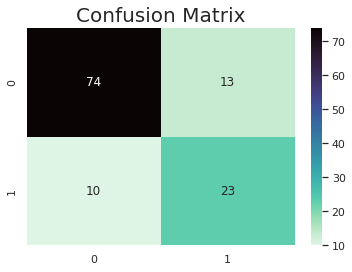

In [32]:
matrix = confusion_matrix(y_test, preds)
sns.heatmap(matrix, annot=True, cmap='mako_r')
plt.title('Confusion Matrix', fontsize=20)
plt.show()

Evaulating the baseline modesl using the F1 score, the **Logistic Regression with no penanlty** model performs best, with the **Random Forest Classifier** and **Ridge Classifier** coming close behind. The **Decision Tree** model seems to perform the worst by a long shot. All models except for **Decision Tree** also achieved quite high accuracy results, this could be due to the target feature class imbalance.

The difference between **Logistic Regression** with an L2 penalty and the **Ridge Regression Classifier** is that the cost functions are different. The Ridge Regression Classifier first labels the target feature as 1 and -1 for the positive and negative class, then fits a linear model using **Least Squared Error** + L2 penalty, whereas the Logistic Regression model uses the Logit Loss function to overcome the nonlinearity of the cost function, where it is more difficult to find a global minima. Hypothetically, this means we could be able to push hyperparameter tuning for the **Ridge Regression Classifier** harder than the **Logistic Regression Classifier** as it is less resource intensive.

On unseen validation data, the best model (Logistic Regression) performs slightly better, where we can see on the confusion matrix that there is a significant class imbalance with many more Negative target values.

## Hyperparameter Tuning

To improve on the models, there are certain aspects we can tune.
1. Impute missing values using different technqiues such as mean, median, mode and a custom transformer
2. Standardise values using different scaling techniques including standard scaling, min max scaling and power scaling 
3. Adjust hyperparameter values for linear and logistic loss functions, to find optimal regularisation weight
4. Adjust hyperparameter values for non-linear (decision tree) loss functions, inclduing entropy measure and tree characteristics

In [33]:
from sklearn import set_config
set_config(display="diagram")

### Preprocessing/ Model Pipeline

In [34]:
preprocess = Pipeline([
    ('drop_columns', FeatureDropper(['ID', 'Insurance'])),
    ('imputer', SimpleImputer(missing_values=0)),
    ('scaler', StandardScaler()),
])

model = LogisticRegression()

full_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
    ])

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

params = [
    {
        'model': [LogisticRegression()],
        'model__solver': ['liblinear'],
        'model__penalty': ['l1', 'l2', 'none'],
        'model__C': [0.01, 0.1, 1, 10, 100, 1000],
        'model__random_state': [39],
        'preprocess__imputer__strategy':['median', 'most_frequent', 'mean'],
        'preprocess__scaler' : [StandardScaler(), PowerTransformer(), MinMaxScaler()],
    },
    {
        'model': [RidgeClassifier()],
        'model__solver' : ['lsqr'],
        'model__class_weight': ['balanced', None],
        'model__alpha' : [0.1, 1, 10, 100, 250], 
        'model__random_state' : [39],
        'model__fit_intercept' : [True, False],
        'preprocess__imputer__strategy':['median', 'most_frequent', 'mean'],
        'preprocess__scaler' : [StandardScaler(), PowerTransformer(), MinMaxScaler()],
    },
    {
        'model' : [DecisionTreeClassifier()],
        'model__criterion' : ['gini', 'entropy'],
        'model__max_depth' : [None, 3, 5, 8, 10],
        'model__min_samples_split' : [2, 4, 8, 20],
        'model__random_state' : [39],
        'model__class_weight' : [None, 'balanced', {'Positive':1, 'Negative':2}],
        'preprocess__imputer__strategy':['median', 'most_frequent', 'mean'],
        'preprocess__scaler' : [None],
    },
    {
        'model': [RandomForestClassifier()],
        'model__criterion' : ['gini', 'entropy'],
        'model__n_estimators': [50, 100],
        'model__max_depth': [5, 8, 10, None],
        'model__min_samples_split' : [2, 4, 6],
        'model__random_state': [39],
        'model__class_weight' : ['balanced', 'balanced_subsample'],
        'preprocess__imputer__strategy':['median', 'most_frequent', 'mean'],
        'preprocess__scaler' : [None],
    },
    ]

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=39)
gs = GridSearchCV(full_pipeline, params, cv = rskf, scoring = {'f1': f1, 'accuracy': accuracy}, refit='f1', n_jobs=-1)
gs.fit(X, y)
gs_cv_results = pd.DataFrame(gs.cv_results_)
gs_results = gs_cv_results[['param_model', 'mean_test_f1', 'mean_test_accuracy']]

In [36]:
gs.best_estimator_

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('drop_columns',
                                  FeatureDropper(feature_names=['ID',
                                                                'Insurance'])),
                                 ('imputer', SimpleImputer(missing_values=0)),
                                 ('scaler', PowerTransformer())])),
                ('model',
                 RidgeClassifier(alpha=250, fit_intercept=False,
                                 random_state=39, solver='lsqr'))])

In [37]:
print(f"Best f1 score is: {round(gs.best_score_, 3)} using {gs.best_params_}")

Best f1 score is: 0.685 using {'model': RidgeClassifier(alpha=250, fit_intercept=False, random_state=39, solver='lsqr'), 'model__alpha': 250, 'model__class_weight': None, 'model__fit_intercept': False, 'model__random_state': 39, 'model__solver': 'lsqr', 'preprocess__imputer__strategy': 'mean', 'preprocess__scaler': PowerTransformer()}


In [38]:
gs_results.sort_values(by='mean_test_f1', ascending=False)[:10]

,param_model,mean_test_f1,mean_test_accuracy
340,"RidgeClassifier(alpha=250, fit_intercept=False...",0.684985,0.728931
337,"RidgeClassifier(alpha=250, fit_intercept=False...",0.683905,0.726162
283,"RidgeClassifier(alpha=250, fit_intercept=False...",0.682375,0.727278
301,"RidgeClassifier(alpha=250, fit_intercept=False...",0.681928,0.727283
304,"RidgeClassifier(alpha=250, fit_intercept=False...",0.681657,0.727810
298,"RidgeClassifier(alpha=250, fit_intercept=False...",0.680243,0.724491
319,"RidgeClassifier(alpha=250, fit_intercept=False...",0.680108,0.721713
247,"RidgeClassifier(alpha=250, fit_intercept=False...",0.679798,0.726162
322,"RidgeClassifier(alpha=250, fit_intercept=False...",0.679792,0.723922
250,"RidgeClassifier(alpha=250, fit_intercept=False...",0.678644,0.725602


In [39]:
pd.DataFrame(gs.best_estimator_.named_steps.model.coef_, columns=X.drop(columns=['ID', 'Insurance']).columns, index=['Weights'])

,PRG,PL,PR,SK,TS,M11,BD2,Age
Weights,0.072828,0.241048,0.011292,0.028665,0.052885,0.147122,0.090132,0.082376


### Grid Search Results
We can see that the Ridge Classifier performed best out of each of the results, increasing the f1 score by 5% and reducing the accuracy which is a positive outcome due to the imbalanced classes. We can see that the lambda/ alpha value (strength of the regularisaton term) chosen, was the highest value of the parameters, so in order to further tune the model, higher values could be chosen. Interestingly, the Power Transformer was consistently the best scaling option, suggesting that the outliers and abnormal distributions noticed in the TS and Age columns could have had relevance to the model. In terms of the weights of the model, PL (Blood Work Result-1) and M11 (Body Mass Index) had the highest weight coefficients, indicating they are relatively more important than other features.

To further improve the model, we can:
1. Attempt to impute the data by the mean, grouped by age group or body mass index range
2. Try higher values of alpha/ lambda regularisation strength to prevent overfitting and increase generalisation to unseen data

In [40]:
# Updating the Stratified Imputer class to take a numpy array as input, due to issues with the Standard Scaler
class StratifiedImputer(BaseEstimator, TransformerMixin):
    '''
    Imputes missing values (0) with the mean of a stratified feature.
    For this dataset we are using Age
    '''
    def __init__(self, by=None, bins=None):
        self.by = by
        self.bins = bins
    
    def fit(self, X, y=None):
        self.df = pd.DataFrame(X)
        self.cut = pd.cut(self.df[self.by], self.bins)
        self.mean = self.df.groupby(self.cut).transform('mean')
        return self
    
    def transform(self, X, y=None):
        X = pd.DataFrame(X).replace(0, np.nan)

        for col in X.columns:
            X[col] = X[col].fillna(round(self.mean[col], 3))
        
        return X.values.astype('float64')

In [41]:
preprocess = Pipeline([
    ('drop_columns', FeatureDropper(['ID', 'Insurance'])),
    ('imputer', SimpleImputer(missing_values=0)),
    ('scaler', StandardScaler()),
])

model = LogisticRegression()

full_pipeline = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
    ])

In [42]:
# Swapping order of imputer and scaler due to input/ output issues with sklearn
rc_params = [{
        'model': [RidgeClassifier()],
        'model__solver' : ['lsqr'],
        'model__class_weight': ['balanced', None],
        'model__alpha' : [0.1, 1, 10, 100, 200, 250, 300], 
        'model__random_state' : [39],
        'model__fit_intercept' : [True, False],
        'preprocess__imputer': [StandardScaler(), PowerTransformer()],
        'preprocess__scaler' : [StratifiedImputer()], 
        'preprocess__scaler__by': [5, 7], #'Age', 'M11'
        'preprocess__scaler__bins': [3, 5, 8, 10],
    }
]
    
rc_gs = GridSearchCV(full_pipeline, rc_params, cv = rskf, scoring = {'f1': f1, 'accuracy': accuracy}, refit='f1', n_jobs=-1)
rc_gs.fit(X, y)
rc_gs_cv_results = pd.DataFrame(rc_gs.cv_results_)
rc_gs_results = rc_gs_cv_results[['param_model', 'mean_test_f1', 'mean_test_accuracy']]


In [43]:
rc_gs.best_estimator_

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('drop_columns',
                                  FeatureDropper(feature_names=['ID',
                                                                'Insurance'])),
                                 ('imputer', PowerTransformer()),
                                 ('scaler', StratifiedImputer(bins=3, by=5))])),
                ('model',
                 RidgeClassifier(alpha=0.1, fit_intercept=False,
                                 random_state=39, solver='lsqr'))])

In [44]:
rc_gs_results[:10]

,param_model,mean_test_f1,mean_test_accuracy
0,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.658452,0.744477
1,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.658452,0.744477
2,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.658452,0.744477
3,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.658452,0.744477
4,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.658452,0.744477
5,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.658452,0.744477
6,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.658452,0.744477
7,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.658452,0.744477
8,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.661472,0.740607
9,"RidgeClassifier(alpha=0.1, fit_intercept=False...",0.661472,0.740607


In [45]:
print(f'Best f1 score: {round(rc_gs.best_score_, 3)}')

Best f1 score: 0.668


Updating the model to include a Stratified Imputer, grouping on Body Mass Index and Age improved on the baseline model for Ridge Classifier, however, did not best the Simple Imputation method. Increasing values of alpha also did not seem to improve much on the previous results. Where we likely have arrived at a close optimal solution for the Ridge Classifier model. Similar methods could be implemented to optimise Random Forest Classifier for example, where we could discretize the features to reduce the complexity for the model. Power Transformer still seems to be the optimal standardisation technique, indicating non-normality of at least some features.

Therefore, we will use the first estimator (f1 score 68%) found to predict test results on the unseen dataset.

In [47]:
test_preds = gs.best_estimator_.predict(test)
pd.DataFrame({'ID' : test['ID'], 'Sepsis' : test_preds}).to_csv('S3455453_predicitions.csv', index=False)